In [ ]:
#To read csv files in Tabular format we would use pandas
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/SpendData.csv')

In [ ]:
data.head(5)

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,b.8,b.9,b.10,b.11,b.12,b.13,b.14,b.15,b.16,b.17,b.18,b.19,b.20,b.21,b.22,pov6,b.23,b.24,b.25,b.26,b.27,b.28,c.29,c.30,var7,c.31,c.32,c.33,...,c.246,c.247,c.248,c.249,c.250,c.251,c.252,c.253,c.254,c.255,c.256,c.257,c.258,c.259,c.260,c.261,c.262,c.263,c.264,c.265,c.266,c.267,c.268,c.269,c.270,c.271,c.272,c.273,c.274,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
0,1,1,2.0,NaN,1,5,1,57,34,1,NaN,1,1.0,2,NaN,NaN,2,NaN,NaN,6,6,6.0,6.0,7,0.0,0.0,14,1,0,0,0,0,0,0,1,1,1,1.0,1,1,...,1,0,0,1,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,5.0,NaN
1,2,1,2.0,NaN,1,4,1,57,34,2,3.0,1,1.0,2,NaN,NaN,2,NaN,NaN,50,50,50.0,50.0,12,0.0,0.0,31,1,14,0,0,0,0,0,2,2,2,NaN,2,0,...,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,NaN
2,3,1,2.0,NaN,1,5,1,57,42,2,1.0,1,1.0,1,93.0,1.0,1,93.0,60.0,6,6,6.0,6.0,7,0.0,0.0,45,1,31,0,0,0,0,0,2,2,3,NaN,2,0,...,0,0,0,1,500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,NaN
3,4,1,2.0,NaN,1,6,1,57,34,2,4.0,1,1.0,2,NaN,NaN,2,NaN,NaN,7,7,7.0,7.0,8,0.0,0.0,14,1,31,0,0,0,0,0,2,2,2,NaN,2,0,...,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,5.0,NaN
4,5,1,2.0,NaN,1,8,1,22,1,1,NaN,1,2.0,1,102.0,0.0,1,93.0,3.0,2,2,2.0,2.0,3,0.0,0.0,32,2,0,0,0,0,0,0,2,2,2,NaN,2,1,...,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,NaN


In [ ]:
#As per the Problem statement the Column/Feature 'pov6' has the respondents divided into 6 categories 
#Here we are analazing about the class imbalance for this Multi-classs Porblem
data['pov6'].value_counts()

1    14197
2     3246
3      335
6      285
4      183
5      133
Name: pov6, dtype: int64

The above output shows that there is a huge Class imbalance if we compare group 1 with group 5 , group 4 , group 6 and group 3 . This class imbalance have to keep in mind while Training the data.
</br>

**Upsampling:** We will try to train the same data 1st without Upsampling by keep an eye on Metric and Model used for this data and if it doesn't work then we would try to work it out with upsampling.
We could use various modules for this task such as sklearn's Resample , Imblearn's Smotes and etc.
</br>


**Downsampling:** We shuold not use downsampling here since if we downsample the entire dataset to number of samples present in any of the group btw 3 to 6 , then we would lose a good amount of valuable data 




In [ ]:
#Getting total number of null values in the Dataset
print('Total Number of NAN values in Dataset: ',data.isnull().sum().sum())

Total Number of NAN values in Dataset:  809220


It seems the given Dataset contains a lot of Null values which needs to be fixed 

In [ ]:
#Getting all the columns which have null values along with the number of null values that they have in the entire column

data_columns = list(data.columns)
null_columns = []
non_null_columns = []
null_values = []
count = 0
for i in range(len(data_columns)):
  if data[data_columns[i]].isnull().sum() == 0:
    non_null_columns.append(data_columns[i])
    pass
  else:
    print(data_columns[i], end = " ")
    print('Column/Feature total number of NAN Values:', end= ' ')
    print(data[data_columns[i]].isnull().sum())
    count += 1
    null_columns.append(data_columns[i])
    null_values.append(data[data_columns[i]].isnull().sum())

var8 Column/Feature total number of NAN Values: 4009
var6 Column/Feature total number of NAN Values: 16480
b.6 Column/Feature total number of NAN Values: 8079
b.8 Column/Feature total number of NAN Values: 1773
b.10 Column/Feature total number of NAN Values: 16007
b.11 Column/Feature total number of NAN Values: 16007
b.13 Column/Feature total number of NAN Values: 11683
b.14 Column/Feature total number of NAN Values: 11920
b.20 Column/Feature total number of NAN Values: 14234
b.21 Column/Feature total number of NAN Values: 15098
c.31 Column/Feature total number of NAN Values: 15225
c.36 Column/Feature total number of NAN Values: 18148
c.37 Column/Feature total number of NAN Values: 18372
c.39 Column/Feature total number of NAN Values: 5359
c.48 Column/Feature total number of NAN Values: 4475
c.60 Column/Feature total number of NAN Values: 7984
c.61 Column/Feature total number of NAN Values: 16770
c.67 Column/Feature total number of NAN Values: 17436
c.77 Column/Feature total number of 

In [ ]:
print('Total number of rows with NAN values: ', count)

Total number of rows with NAN values:  73


In [ ]:
#Setting a thresold for NAN Values
#Here we are setting the threshold to 99 and rejecting all other columns that contains number of null values in 3 digits 

total_rows = len(data)
threshold_value = 99
rejected_columns = []
appending_columns = []
for i in range(len(null_values)):
  if null_values[i] >= threshold_value:
    rejected_columns.append(null_columns[i])
  else:
    appending_columns.append(null_columns[i])


print('Number of Columns/Features Rejected due to Threshold value:', len(rejected_columns))
print('Number of Columns/Features Selected to be in Dataset as per Threshold value:', len(appending_columns))

data.drop(columns= rejected_columns , inplace= True)
print('Shape of Data with removing columns with high amount of null_values ',data.shape)

Number of Columns/Features Rejected due to Threshold value: 60
Number of Columns/Features Selected to be in Dataset as per Threshold value: 13
Shape of Data with removing columns with high amount of null_values  (18379, 241)


Now we need to now fill all the null values with somw kind of logic in order to remove null values entirely from the dataset

In [ ]:
data[appending_columns].describe()

,c.77,c.125,c.135,c.140,c.141,c.145,c.147,c.148,t7.149,t7.153,t7.154,t7.157,t7.158
count,18301.000000,18302.000000,18312.000000,18375.000000,18376.000000,18378.000000,18378.000000,18378.000000,18312.000000,18375.000000,18377.000000,18376.000000,18303.000000
mean,442.001570,432.809165,108.445045,22.320676,28.462364,2.476381,1.512926,0.075566,108.445045,22.320676,28.460815,15.704016,258.827959
std,668.713513,582.908732,350.324365,46.076570,55.646490,14.028052,28.527704,5.310951,350.324365,46.076570,55.645372,69.434167,452.892203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.730000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.670000
50%,250.000000,250.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000,0.000000,0.000000,0.000000,150.000000
75%,500.000000,500.000000,125.000000,30.000000,45.000000,0.000000,0.000000,0.000000,125.000000,30.000000,45.000000,0.000000,300.000000
max,31467.400000,6600.000000,33333.000000,1000.000000,1500.000000,500.000000,1950.000000,600.000000,33333.000000,1000.000000,1500.000000,3000.000000,33333.000000


In [ ]:
print(' Total number of NAN values in current Dataset: ',data[appending_columns].isnull().sum().sum())

#Filling all the NAN Values with the most frequent occuring values in the columns
for column in data[appending_columns].columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

print(' Total number of NAN valuesin Dataset after filling: ',data[appending_columns].isnull().sum().sum())

 Total number of NAN values in current Dataset:  384
 Total number of NAN valuesin Dataset after filling:  0


In [ ]:
print('Shape of Training Dataset:', data.shape)

Shape of Training Dataset: (18379, 241)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Columns: 241 entries, Unnamed: 0 to c.283
dtypes: float64(75), int64(165), object(1)
memory usage: 33.8+ MB


In [ ]:
import numpy as np
object_columns = data.dtypes[data.dtypes == np.object]
print(object_columns)

respondent.id    object
dtype: object


In [ ]:
import re
data['respondent.id'] = data['respondent.id'].apply(lambda x : re.sub('2016_' , '' , x))
data['respondent.id'] = data['respondent.id'].astype('int64')

In [ ]:
object_columns = data.dtypes[data.dtypes == np.object]
print(object_columns)

Series([], dtype: object)


In [ ]:
#Reading the test data in tabular formal using pandas
test_df = pd.read_csv('/content/drive/MyDrive/TestData.csv')
test_df.head(5)

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,b.8,b.9,b.10,b.11,b.12,b.13,b.14,b.15,b.16,b.17,b.18,b.19,b.20,b.21,b.22,pov6,b.23,b.24,b.25,b.26,b.27,b.28,c.29,c.30,var7,c.31,c.32,c.33,...,c.245,c.246,c.247,c.248,c.249,c.250,c.251,c.252,c.253,c.254,c.255,c.256,c.257,c.258,c.259,c.260,c.261,c.262,c.263,c.264,c.265,c.266,c.267,c.268,c.269,c.270,c.271,c.272,c.273,c.274,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284
0,9,1,1.0,NaN,1,11,1,47,8,2,1.0,1,1.0,1,211.0,0.0,1,211.0,NaN,12,12,12.0,12.0,10,0.0,0.0,31,NaN,14,0,0,0,0,0,2,2,2,NaN,2,0,...,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3.0
1,15,1,2.0,NaN,1,11,1,65,27,1,NaN,1,1.0,2,NaN,NaN,2,NaN,NaN,4,4,4.0,4.0,5,0.0,0.0,14,NaN,0,0,0,0,0,0,1,1,1,1.0,1,1,...,0,1,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,3.0
2,16,1,2.0,NaN,1,6,1,65,27,2,1.0,1,1.0,2,NaN,NaN,2,NaN,NaN,56,56,56.0,56.0,12,0.0,0.0,45,NaN,0,0,0,0,0,0,2,2,3,NaN,2,0,...,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.0
3,24,1,1.0,NaN,1,3,1,3,2,1,NaN,1,1.0,1,35.0,3.0,1,90.0,NaN,5,5,5.0,5.0,6,0.0,0.0,14,NaN,0,0,0,0,0,0,2,2,2,NaN,2,0,...,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,32,1,1.0,NaN,1,5,1,83,3,1,NaN,1,4.0,1,94.0,5.0,1,200.0,4.0,4,4,4.0,4.0,5,0.0,0.0,14,NaN,0,0,0,0,0,0,2,2,2,NaN,2,0,...,1,1,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,NaN


Since we are traning our dataset with reduced number of columns/Features , hence we need to remove those columns/features from test data as well

In [ ]:
test_df.drop(columns= rejected_columns , inplace = True )
print('Shape of Testing Data: ', test_df.shape)

KeyError: ignored

It seems column/feature : t.158 is not present in test_data so either we need to populate this feild in testing data or we need to remove it entirely from the training data as well

We have already removed the column/Feature t.158 from the training data since it had null values in three digits in earlier part of Preprocessing.

In [ ]:
#Here we are removing the column t.158 from the rejected_column list using remove 
rejected_columns.remove('t.158')
test_df.drop(columns= rejected_columns , inplace = True )

In [ ]:
# Number of cloumns/Features in Testing data should be same as that of Training Data
print('Shape of Testing Data: ',test_df.shape)

#Filling all the NAN Values with the most frequent occuring values in the columns
for column in test_df[appending_columns].columns:
    test_df[column].fillna(test_df[column].mode()[0], inplace=True)

Shape of Testing Data:  (4595, 241)


In [ ]:
import re
test_df['respondent.id'] = test_df['respondent.id'].apply(lambda x : re.sub('2016_' , '' , x))
test_df['respondent.id'] = test_df['respondent.id'].astype('int64')

In [ ]:
#Now we would split our training , testing and Cross_validation data

from sklearn.model_selection import train_test_split

x = data.drop(columns= ['pov6'] )
y = data['pov6']

x_train , x_cv , y_train , y_cv = train_test_split(x,y , test_size = 0.33 , random_state = 42)
x_test = test_df.drop(columns= ['pov6'])
y_test = test_df['pov6']

print('Shape of Traning Data: ', x_train.shape)
print('shape of Cross-validation Data: ', x_cv.shape)
print('Shape of Testing Data: ', x_test.shape)

Shape of Traning Data:  (12313, 240)
shape of Cross-validation Data:  (6066, 240)
Shape of Testing Data:  (4595, 240)


In [ ]:
# We will one hot encode the Class label column in order to do Multi-class classification Problem

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
#Traning Class labels
y_train = le.fit_transform(y_train)
y_train = to_categorical(y_train)
print('Shape of Training Class label Data: ', y_train.shape)
#Cross-validation Class labels
y_cv = le.transform(y_cv)
y_cv = to_categorical(y_cv)
print('Shape of Cross-Validation Class label Data: ', y_cv.shape)

Shape of Training Class label Data:  (12313, 6)
Shape of Cross-Validation Class label Data:  (6066, 6)


In [ ]:
print('Null_values in Testing_Class Labels: ',y_test.isnull().sum().sum())

#In testing Data we don't have any class labels and we would need to predict all of them using your model 

Null_values in Testing_Class Labels:  4595


a. Please explain the choice of metric / evaluation criterion used :

**Metric:** Since we have a lot of class imbalance thus we cannot use accuracy as a metric for this problem statement and hence we need to choose a metric which could provide the performance each class wise and then weighted average of that performance would be our metric. This could be achived using F1_score which uses precision and recall class wise in multi-class problems.

A macro-average will compute the metric independently for each class and then take the average and hence in the process it treats all the classes equally , whereas a micro-average will aggregate the contributions of all classes to compute the average metric.
Thus we would use Micro F1_score to compute our model's performance 
</br>
</br>
**Model:** Here we are choosing one of the ensemble's model RandomForest since it has multiple estimators and would work great in case of outliers and will keep an eye on the metric through F1_score

What were the approaches you considered? Please explain the reason for the technique/ approach used as well as the pros and cons.

Here in this task I have used Hyper-parameter tunning in order to find the best possible value of F1_score through RandomizedSearchCV.
Also the training data is divided into 2 parts using sklearn's train_test_split : one part is used to train our model while the other is kept unseen to the model and used for generating cross validation results to observe the performance of the model. Since there is a class imbalance and entries for group 6,5 and 4 are way less , we might have end up traning over model with very less entires which belongs to these groups 

In [ ]:
# Hyperparamter tunning the essential parameters of the RandomForest Classifier
# Using RamdomizedSearchCV for Hypertunning 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer
import warnings
warnings.filterwarnings("ignore")

# making a f1_score funtion separetly in order to fit that into RandomizedSearchCV
f1 = make_scorer(f1_score , average = 'micro')
model = RandomForestClassifier()

#parameters considered for hyperparameter tunning are min_samples_split and n_estimators
parameters = {'min_samples_split' :[1,2,3,4],
              'n_estimators' : [100,300,500,1000,2000]}

cross_validation = RandomizedSearchCV(model, parameters, cv = 3 , scoring = f1 , return_train_score= True, verbose = 5)
cross_validation.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=1000, min_samples_split=4 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=4, score=(train=0.994, test=0.948), total=  21.7s
[CV] n_estimators=1000, min_samples_split=4 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.6s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=4, score=(train=0.994, test=0.951), total=  22.5s
[CV] n_estimators=1000, min_samples_split=4 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   50.1s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=4, score=(train=0.995, test=0.949), total=  22.3s
[CV] n_estimators=2000, min_samples_split=3 ..........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=3, score=(train=1.000, test=0.947), total=  43.6s
[CV] n_estimators=2000, min_samples_split=3 ..........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.1min remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=3, score=(train=0.999, test=0.951), total=  45.6s
[CV] n_estimators=2000, min_samples_split=3 ..........................
[CV]  n_estimators=2000, min_samples_split=3, score=(train=1.000, test=0.949), total=  44.3s
[CV] n_estimators=2000, min_samples_split=2 ..........................
[CV]  n_estimators=2000, min_samples_split=2, score=(train=1.000, test=0.948), total=  44.4s
[CV] n_estimators=2000, min_samples_split=2 ..........................
[CV]  n_estimators=2000, min_samples_split=2, score=(train=1.000, test=0.951), total=  45.7s
[CV] n_estimators=2000, min_samples_split=2 ..........................
[CV]  n_estimators=2000, min_samples_split=2, score=(train=1.000, test=0.950), total=  44.6s
[CV] n_estimators=2000, min_samples_split=4 ..........................
[CV]  n_estimators=2000, min_samples_split=4, score=(train=0.994, test=0.948), total=  43.7s
[CV] n_estimators=2000, min_samples_split=4 ..........................
[CV]  n_estimato

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 10.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
results = pd.DataFrame.from_dict(cross_validation.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,20.575007,0.317045,1.571967,0.010299,1000,4,"{'n_estimators': 1000, 'min_samples_split': 4}",0.948187,0.950771,0.948848,0.949268,0.001096,3,0.994138,0.993894,0.994626,0.994219,0.000305
1,41.368952,0.792065,3.136507,0.009203,2000,3,"{'n_estimators': 2000, 'min_samples_split': 3}",0.947109,0.951277,0.948885,0.949090,0.001708,5,0.999574,0.999452,0.999695,0.999574,0.000099
2,41.669513,0.536298,3.184189,0.038965,2000,2,"{'n_estimators': 2000, 'min_samples_split': 2}",0.947706,0.951499,0.949704,0.949637,0.001549,1,1.000000,1.000000,1.000000,1.000000,0.000000
3,41.303706,0.787145,3.164752,0.025925,2000,4,"{'n_estimators': 2000, 'min_samples_split': 4}",0.947927,0.950278,0.948885,0.949030,0.000965,6,0.994321,0.994323,0.995176,0.994607,0.000403
4,10.394404,0.257945,0.800420,0.008166,500,3,"{'n_estimators': 500, 'min_samples_split': 3}",0.948238,0.951923,0.948238,0.949466,0.001737,2,0.999330,0.999330,0.999452,0.999370,0.000057
5,0.174566,0.004493,0.000000,0.000000,500,1,"{'n_estimators': 500, 'min_samples_split': 1}",NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN
6,10.473683,0.113159,0.799336,0.002848,500,2,"{'n_estimators': 500, 'min_samples_split': 2}",0.947433,0.951511,0.948497,0.949147,0.001727,4,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.638818,0.011814,0.000000,0.000000,2000,1,"{'n_estimators': 2000, 'min_samples_split': 1}",NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN
8,2.123621,0.024988,0.170614,0.002941,100,2,"{'n_estimators': 100, 'min_samples_split': 2}",0.947057,0.949525,0.947304,0.947962,0.001110,7,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.327094,0.005693,0.000000,0.000000,1000,1,"{'n_estimators': 1000, 'min_samples_split': 1}",NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Hyperparameter Tunning Test Scores:F1_score')

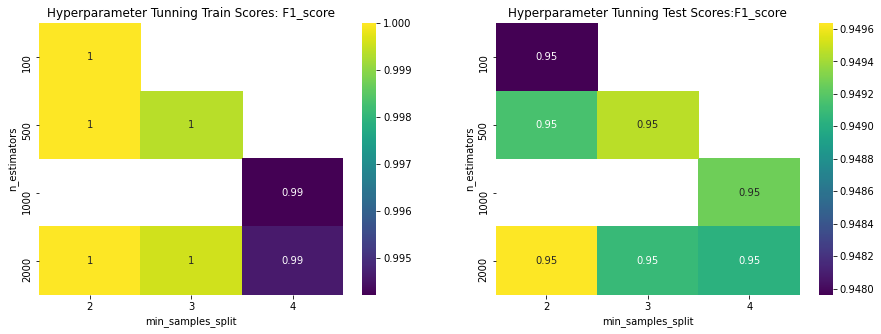

In [ ]:
#Creating a Heatmap for Visualizing F1-score using different values of parameters 

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame()
df['n_estimators'] = results['param_n_estimators']
df['min_samples_split'] = results['param_min_samples_split']
df['train_score'] = results['mean_train_score']
df['test_score'] = results['mean_test_score']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
heatmap_data1 = pd.pivot_table(df, values = 'train_score' , index = ['n_estimators'] , columns = 'min_samples_split')
sns.heatmap(heatmap_data1, annot = True , cmap="viridis")
plt.title('Hyperparameter Tunning Train Scores: F1_score')
plt.subplot(1,2,2)
heatmap_data2 = pd.pivot_table(df, values = 'test_score' , index = ['n_estimators'] , columns = 'min_samples_split')
sns.heatmap(heatmap_data2, annot = True , cmap="viridis")
plt.title('Hyperparameter Tunning Test Scores:F1_score')


b. What are the assumptions you made when building this model?

The assumptions made while building our RandomForest Classifier are as follows:

1.   At each step of building individual tree we find the best split of data
2.   While building a tree we use not the whole dataset, but bootstrap sample



In [ ]:
#Using Best parameters claculated using Hyperparameter Tunning to train the RandomForest model
Rf = RandomForestClassifier(n_estimators = cross_validation.best_params_.get('n_estimators')
                            ,min_samples_split = cross_validation.best_params_.get('min_samples_split')  )
Rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

#Predicting the class labels for cross-validation report 
y_pred = Rf.predict(x_cv)
print('Shape of predicted value for Cross_valiidation: ',y_pred.shape)

print('Cross-Validation _Results:\n')
matrix = confusion_matrix(y_cv.argmax(axis=1), y_pred.argmax(axis=1))
print('Confusion Matrix:')
print(matrix)

print('\nClassification_Report:')
print(classification_report(y_cv, y_pred))
print('F1-Score', f1_score(y_cv, y_pred , average= 'micro'))

Shape of predicted value for Cross_valiidation:  (6066, 6)
Cross-Validation _Results:

Confusion Matrix:
[[4633   34    0    1    0    0]
 [ 132  939    0    0    0    0]
 [  20    4   89    0    0    0]
 [  34   22    0    8    0    2]
 [  27    3    0    0   16    0]
 [  43    9    0    0    0   50]]

Classification_Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4668
           1       0.93      0.88      0.90      1071
           2       1.00      0.79      0.88       113
           3       0.89      0.12      0.21        66
           4       1.00      0.35      0.52        46
           5       0.96      0.49      0.65       102

   micro avg       0.96      0.94      0.95      6066
   macro avg       0.96      0.60      0.69      6066
weighted avg       0.96      0.94      0.94      6066
 samples avg       0.94      0.94      0.94      6066

F1-Score 0.95077590522276


e. How confident are you of the model’s robustness and how would you explain the model’s performance?

The randomness in data whcih is used to train the Decision Trees makes the RandomForests robust to outliers to some extent.
The metric we used to evaluate our model i.e. Micro F1_score comes out to be 0.95 which is a decent value and thus we conclude that our model is performing well.

f. Why is your model performing well / not well?

RandomForest Classifier works well tabular kind of data and also the randomness in selecting samples from the training data for training different Decision Trees to its max depth adds a plus point which helps the model to perform well

In [ ]:
y_test = Rf.predict(x_test)

ValueError: ignored

It seems our Test Data conatains some NAN values and we would have to observe

In [ ]:
data_columns = list(x_test.columns)
null_columns = []
non_null_columns = []
null_values = []
count = 0
for i in range(len(data_columns)):
  if x_test[data_columns[i]].isnull().sum() == 0:
    non_null_columns.append(data_columns[i])
    pass
  else:
    print(data_columns[i], end = " ")
    print('Column/Feature total number of NAN Values:', end= ' ')
    print(x_test[data_columns[i]].isnull().sum())
    count += 1
    null_columns.append(data_columns[i])
    null_values.append(x_test[data_columns[i]].isnull().sum())

totshopping.rep Column/Feature total number of NAN Values: 4595


This means that the entire Column/Feature totshopping.rep conatins NULL values which is generating such problem while predicting the class labels and this a prblem of Data Leakage 

In [ ]:
x_train['totshopping.rep'].describe()

count    12313.000000
mean       331.300123
std        366.590573
min          1.620000
25%        114.060000
50%        228.600000
75%        420.890000
max       5078.540000
Name: totshopping.rep, dtype: float64

Here we have two options either to remove the entire Column/Featrue or to populate the entire column using some methodlogy.

We weould try the 2nd option and try to populate the values for this Column/Featrue using a Linear Regression Model and will use RSquared Coefficient in order to check how well is it populating in the field 

In [ ]:
x_shopping = x_train.drop(columns = ['totshopping.rep'])
y_shopping = x_train['totshopping.rep']

x_shopping_train, x_shopping_cv , y_shopping_train , y_shopping_cv = train_test_split(x_shopping, y_shopping , test_size = 0.33)

print('Training Data shape: ', x_shopping_train.shape)
print('Cross_validation Data shape: ', x_shopping_cv.shape)

#Import Linear Regression Model
from sklearn.linear_model import LinearRegression

#Creating an Object of Linear Regression
lr = LinearRegression()
lr.fit(x_shopping_train, y_shopping_train)

Training Data shape:  (8249, 239)
Cross_validation Data shape:  (4064, 239)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import r2_score

print('shape of CV Data : ', y_shopping_cv.shape)
y_pred = lr.predict(x_shopping_cv)
print('Shape of Predicted Data: ',y_pred.shape)

print('Cross-validation Metric for Linear Regression: ',r2_score(y_shopping_cv, y_pred))

shape of CV Data :  (4064,)
Shape of Predicted Data:  (4064,)
Cross-validation Metric for Linear Regression:  0.999999102310064


g. Was any feature engineering required? If yes, what were they. If no, why?

Performance of Linear Regression Model is quite good and I guess we could use this model in order populate the Column: 'totshopping.rep'
using this model.
</br>
This entire process in known as Model based Imputation 

This was the only Feature Engineering required since the Feature : 'totshopping.rep' had only Null values and we needed to do Model based Impuatation 

In [ ]:
#Predicting Column 'totshopping.rep' in test data in order to help the prediction of groups using RandomForests Model
pred = lr.predict(x_test.drop(columns= ['totshopping.rep']))
print('Shape of Prediction: ',pred.shape)

x_test['totshopping.rep'] = pred

Shape of Prediction:  (4595,)


In [ ]:
import numpy as np

y_test = Rf.predict(x_test)
print('Shape of Prediction of respondents group in pov6: ',y_test.shape)

group_predictions = np.argmax(y_test, axis= 1)
print('Shape of array conatining Group Predictions: ',group_predictions.shape)

for i in range(len(group_predictions)):
  group_predictions[i] = group_predictions[i]+1

group_predictions = pd.DataFrame(group_predictions)
print('\nNumber of Groups present in Test Data: ')
group_predictions.value_counts()

Shape of Prediction of respondents group in pov6:  (4595, 6)
Shape of array conatining Group Predictions:  (4595,)

Number of Groups present in Test Data: 


1    3685
2     790
3      71
6      32
5      15
4       2
dtype: int64

In [ ]:
#Dumping the model in order to use it afterwards to predict the testing data
from sklearn.externals import joblib

joblib.dump(Rf , 'RandomForest_Model.pkl')

['RandomForest_Model.pkl']

d. Please explain under what conditions will the model you choose be not appropriate

If the Dataset had been too sparse then our model RandomForest wouldn't have worked as well as it is working right now 

If the Data used to train would be image data or graph data even then our model wouldn't have worked this properly 

If the test_data has all together different kind of data distribution then predicted results might not be that accurate.

# Future Work:

1. Further we could use feature imporatnce in order to get the features which contributes maximum in the performance of model. These Features could be transformed basically know as Feature Tranform which takes the features into a higher dimensional space and new features could be added up to the list which might help in increasing performance of model.
<br>
Note: Decision Tree based model donot require scaling.
</br>


2. We could use deep learning models on this dataset keeping activation functions as sigmoid since it would keep the effect of outliers less due to squashing. Also we would try scaling the data and apply relu activation functions but we need to keep in mind that vanishing gradient prblem don't occur due to high number to parameters and chain rle of differentiation.

3. We can also use linear models such as SVM after standardizing the data along with its other kernel versions where we could use RBF , polynomial kernel in order to handle non-linearity in the data.


